==============================\
Student name: Shiqi Yin \
GitHub username: acse-sy121\
\==============================

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install vtk

     |████████████████████████████████| 88.3 MB 148 kB/s 


In [ ]:
import sys

# Scikit-Learn ≥0.20 is required
import sklearn
import os
os.chdir("/content/drive/MyDrive")
# Common imports
import numpy as np
import vtk
import vtktools
import time

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
def loadvtufile(path, name_simu, fieldname, vtu_start, vtu_end, vtu_step):
    """
    Read in .vtu files for a particular field
    
    Parameters
    ----------
    path : str 
        path to the folder containing the .vtu files
    name_simu : str
        name of the simulation data
    field_name : str
        field to read in e.g. CO2_ppm 
    vtu_start : int
        file number to start reading from  
    vtu_end : int
        file number to read up to
    vtu_step : int
        how many files to step across
    Returns
    -------
    numpy.ndarray 
        Returns the data from a particular field 
    """
    tic = time.time()
    extension = '.vtu'
    all_data = []
    #---------------------------------------------------------------------
    # EXTRACT DATA
    #---------------------------------------------------------------------
    for vtuID in range(vtu_start,vtu_end+1,vtu_step):
        filename=path+name_simu+'_'+str(vtuID)+extension
        print ('\n  '+str(filename))
        vtu_data = vtktools.vtu(filename)
        data = vtu_data.GetField(fieldname)
        all_data.append(data)
        # print(vtuID)
    toc = time.time() #added 
    print ('\n\nTime : ', toc - tic, 'sec')
    return np.array(all_data)

In [ ]:
#--------------------------------#
#-- Choose variables --#
#--------------------------------#
# The path where the vtu files are located
path = '/content/drive/MyDrive/Cotrace_fixed_sparse/' 
# The prefix of the file name of the vtu file
name_simu = 'Cotrace_fixed'
vtu_start = 1
vtu_end   = 720
vtu_step  = 1

In [ ]:
vtu_data1 = vtktools.vtu('/content/drive/MyDrive/Cotrace_fixed/Cotrace_fixed_6.vtu')
field_name = vtu_data1.GetFieldNames()
print(field_name)

['Pressure', 'Temperature', 'Tracer', 'TracerInterpolationErrorBound', 'Humidity', 'HumidityInterpolationErrorBound', 'Virus1', 'Virus1InterpolationErrorBound', 'teacher', 'teacherInterpolationErrorBound', 'filter', 'filterSource', 'filterInterpolationErrorBound', 'teacher_f', 'teacher_fInterpolationErrorBound', 'Time', 'Velocity', 'VelocitySource', 'VelocityAbsorption', 'GravityDirection', 'TracerDiffusivity', 'HumidityDiffusivity', 'teacherDiffusivity', 'teacher_fDiffusivity']


In [ ]:
data = vtu_data1.GetField('Time')
data

In [ ]:
# Extract data of 'CO2_ppm' field
CO2data_initial = loadvtufile(path, name_simu, 'Tracer', vtu_start, vtu_end, vtu_step)
# Extract data of 'Velocity' field
Udata = loadvtufile(path, name_simu, 'Velocity', vtu_start, vtu_end, vtu_step)
# Extract data of 'Humidity' field
Humidity_data = loadvtufile(path, name_simu, 'Humidity', vtu_start, vtu_end, vtu_step)
# Extract data of 'Temperature' field
Temperature_data = loadvtufile(path, name_simu, 'Temperature', vtu_start, vtu_end, vtu_step)
# Extract data of 'Virus1' field
Virus1_data = loadvtufile(path, name_simu, 'Virus1', vtu_start, vtu_end, vtu_step)

In [ ]:
import joblib
joblib.dump(CO2data_initial, '/content/drive/MyDrive/output_files/DATA/initial_field_data/CO2_initial.pkl')
joblib.dump(Udata, '/content/drive/MyDrive/output_files/DATA/initial_field_data/Udata_initial.pkl')
joblib.dump(Humidity_data, '/content/drive/MyDrive/output_files/DATA/initial_field_data/Humidity_initial.pkl')
joblib.dump(Temperature_data, '/content/drive/MyDrive/output_files/DATA/initial_field_data/Temperature_initial.pkl')
joblib.dump(Virus1_data, '/content/drive/MyDrive/output_files/DATA/initial_field_data/Virus1_initial.pkl')

['/content/drive/MyDrive/output_files/DATA/initial_field_data/Virus1_initial.pkl']

In [ ]:
print(CO2data_initial.shape)

(720, 54363, 1)


In [ ]:
import joblib
CO2data_initial = joblib.load('/content/drive/MyDrive/output_files/DATA/initial_field_data/CO2_initial.pkl')
Udata = joblib.load('/content/drive/MyDrive/output_files/DATA/initial_field_data/Udata_initial.pkl')
Humidity_data = joblib.load('/content/drive/MyDrive/output_files/DATA/initial_field_data/Humidity_initial.pkl')
Temperature_data = joblib.load('/content/drive/MyDrive/output_files/DATA/initial_field_data/Temperature_initial.pkl')
Virus1_data = joblib.load('/content/drive/MyDrive/output_files/DATA/initial_field_data/Virus1_initial.pkl')

In [ ]:
observation = np.load('/content/drive/MyDrive/output_files/DATA/observation.npy')
velocity_sensor = np.load('/content/drive/MyDrive/output_files/DATA/observation1.npy')

In [ ]:
print(velocity_sensor.shape)

(720, 3, 18)


In [ ]:
obs_CO2 = np.array(observation[:,0,:]*1e6)
obs_xdata = np.array(velocity_sensor[:,0,:])
obs_ydata = np.array(velocity_sensor[:,1,:])
obs_zdata = np.array(velocity_sensor[:,2,:])
obs_Humidity = np.array(observation[:,1,:])
obs_Temperature = np.array(observation[:,2,:])
obs_Virus1 = np.array(observation[:,3,:])

In [ ]:
# obs_CO2 = np.array(observation[0,:,:]*1e6)
# obs_xdata = np.array(observation[1,:,:])
# obs_ydata = np.array(observation[2,:,:])
# obs_zdata = np.array(observation[3,:,:])
# obs_Humidity = np.array(observation[4,:,:])
# obs_Temperature = np.array(observation[5,:,:])
# obs_Virus1 = np.array(observation[6,:,:])

In [ ]:
xdata = Udata[:,:,0]
ydata = Udata[:,:,1]
zdata = Udata[:,:,2]

In [ ]:
CO2data_initial[CO2data_initial < 0] = 0
CO2data = CO2data_initial * 1e6
print(CO2data.max())
print(CO2data.min())
print(CO2data.mean())
print(CO2data.shape)

28874.514624476433
411.89027251675725
1168.2874822477463
(720, 54363, 1)


In [ ]:
def data_reshape(dataset):
  nfiles = dataset.shape[0]
  nNodes = dataset.shape[1]
  reshape_data = dataset.reshape((nfiles, nNodes))
  print("Dataset shape: ", reshape_data.shape)

  return reshape_data

In [ ]:
CO2 = data_reshape(CO2data)
Humidity = data_reshape(Humidity_data)
Temperature = data_reshape(Temperature_data)
Virus1 = data_reshape(Virus1_data)

Dataset shape:  (720, 54363)
Dataset shape:  (720, 54363)
Dataset shape:  (720, 54363)
Dataset shape:  (720, 54363)


The data reshaped is saved in *data_reshaped* folder here.

In [ ]:
import joblib
joblib.dump(CO2, '/content/drive/MyDrive/output_files/DATA/data_reshaped/CO2data.pkl')
joblib.dump(xdata, '/content/drive/MyDrive/output_files/DATA/data_reshaped/xdata.pkl')
joblib.dump(ydata, '/content/drive/MyDrive/output_files/DATA/data_reshaped/ydata.pkl')
joblib.dump(zdata, '/content/drive/MyDrive/output_files/DATA/data_reshaped/zdata.pkl')
joblib.dump(Humidity, '/content/drive/MyDrive/output_files/DATA/data_reshaped/Humidity_data.pkl')
joblib.dump(Temperature, '/content/drive/MyDrive/output_files/DATA/data_reshaped/Temperature_data.pkl')
joblib.dump(Virus1, '/content/drive/MyDrive/output_files/DATA/data_reshaped/Virus1_data.pkl')


['/content/drive/MyDrive/output_files/DATA/data_reshaped/Virus1_data.pkl']

In [ ]:
import joblib
CO2 = joblib.load('/content/drive/MyDrive/output_files/DATA/data_reshaped/CO2data.pkl')
xdata = joblib.load('/content/drive/MyDrive/output_files/DATA/data_reshaped/xdata.pkl')
ydata = joblib.load('/content/drive/MyDrive/output_files/DATA/data_reshaped/ydata.pkl')
zdata = joblib.load('/content/drive/MyDrive/output_files/DATA/data_reshaped/zdata.pkl')
Humidity = joblib.load('/content/drive/MyDrive/output_files/DATA/data_reshaped/Humidity_data.pkl')
Temperature = joblib.load('/content/drive/MyDrive/output_files/DATA/data_reshaped/Temperature_data.pkl')
Virus1 = joblib.load('/content/drive/MyDrive/output_files/DATA/data_reshaped/Virus1_data.pkl')

In [ ]:
def train_test_split(field_data):
  X_train_array = []
  X_test_array = []

  for i in range(int(len(field_data)*0.8)):
    X_train_array.append(field_data[i])
  X_train_array = np.array(X_train_array)

  for i in range(int(len(field_data)*0.8),len(field_data)):
    X_test_array.append(field_data[i])
  X_test_array = np.array(X_test_array)

  print("Train dataset shape: ", X_train_array.shape)
  print("Test dataset shape: ", X_test_array.shape)

  return X_train_array, X_test_array

In [ ]:
CO2_train_origin, CO2_test_origin = train_test_split(CO2)
x_train, x_test = train_test_split(xdata)
y_train, y_test = train_test_split(ydata)
z_train, z_test = train_test_split(zdata)
Humidity_data_train, Humidity_data_test = train_test_split(Humidity)
Temperature_data_train, Temperature_data_test = train_test_split(Temperature)
Virus1_data_train, Virus1_data_test = train_test_split(Virus1)

In [ ]:
ob_CO2_train, ob_CO2_test = train_test_split(obs_CO2)
ob_xdata_train, ob_xdata_test = train_test_split(obs_xdata)
ob_ydata_train, ob_ydata_test = train_test_split(obs_ydata)
ob_zdata_train, ob_zdata_test = train_test_split(obs_zdata)
ob_Humidity_train, ob_Humidity_test = train_test_split(obs_Humidity)
ob_Temperature_train, ob_Temperature_test = train_test_split(obs_Temperature)
ob_Virus1_train, ob_Virus1_test = train_test_split(obs_Virus1)

Train dataset shape:  (576, 18)
Test dataset shape:  (144, 18)
Train dataset shape:  (576, 18)
Test dataset shape:  (144, 18)
Train dataset shape:  (576, 18)
Test dataset shape:  (144, 18)
Train dataset shape:  (576, 18)
Test dataset shape:  (144, 18)
Train dataset shape:  (576, 18)
Test dataset shape:  (144, 18)
Train dataset shape:  (576, 18)
Test dataset shape:  (144, 18)
Train dataset shape:  (576, 18)
Test dataset shape:  (144, 18)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_CO2 = MinMaxScaler((-1, 1))
scaler_x = MinMaxScaler((-1, 1))
scaler_y = MinMaxScaler((-1, 1))
scaler_z = MinMaxScaler((-1, 1))
scaler_Humidity = MinMaxScaler((-1, 1))
scaler_Temperature = MinMaxScaler((-1, 1))
scaler_Virus1 = MinMaxScaler((-1, 1))

scaler_CO2_test = MinMaxScaler((-1, 1))
scaler_x_test = MinMaxScaler((-1, 1))
scaler_y_test = MinMaxScaler((-1, 1))
scaler_z_test = MinMaxScaler((-1, 1))
scaler_Humidity_test = MinMaxScaler((-1, 1))
scaler_Temperature_test = MinMaxScaler((-1, 1))
scaler_Virus1_test = MinMaxScaler((-1, 1))

scaler_CO2_all = MinMaxScaler((-1, 1))
scaler_x_all = MinMaxScaler((-1, 1))
scaler_y_all = MinMaxScaler((-1, 1))
scaler_z_all = MinMaxScaler((-1, 1))
scaler_Humidity_all = MinMaxScaler((-1, 1))
scaler_Temperature_all = MinMaxScaler((-1, 1))
scaler_Virus1_all = MinMaxScaler((-1, 1))

# Apply transform to these data set.
norm_CO2_train = scaler_CO2.fit_transform(CO2_train_origin)
norm_x_train = scaler_x.fit_transform(x_train)
norm_y_train = scaler_y.fit_transform(y_train)
norm_z_train = scaler_z.fit_transform(z_train)
norm_Humidity_train = scaler_Humidity.fit_transform(Humidity_data_train)
norm_Temperature_train = scaler_Temperature.fit_transform(Temperature_data_train)
norm_Virus1_train = scaler_Virus1.fit_transform(Virus1_data_train)

norm_CO2_test = scaler_CO2_test.fit_transform(CO2_test_origin)
norm_x_test = scaler_x_test.fit_transform(x_test)
norm_y_test = scaler_y_test.fit_transform(y_test)
norm_z_test = scaler_z_test.fit_transform(z_test)
norm_Humidity_test = scaler_Humidity_test.fit_transform(Humidity_data_test)
norm_Temperature_test = scaler_Temperature_test.fit_transform(Temperature_data_test)
norm_Virus1_test = scaler_Virus1_test.fit_transform(Virus1_data_test)

norm_CO2_all = scaler_CO2_all.fit_transform(CO2)
norm_x_all = scaler_x_all.fit_transform(xdata)
norm_y_all = scaler_y_all.fit_transform(ydata)
norm_z_all = scaler_z_all.fit_transform(zdata)
norm_Humidity_all = scaler_Humidity_all.fit_transform(Humidity)
norm_Temperature_all = scaler_Temperature_all.fit_transform(Temperature)
norm_Virus1_all = scaler_Virus1_all.fit_transform(Virus1)


In [ ]:
train_all_values = np.hstack((norm_CO2_train, norm_x_train, norm_y_train, norm_z_train, norm_Humidity_train, norm_Temperature_train, norm_Virus1_train))
test_all_values = np.hstack((norm_CO2_test, norm_x_test, norm_y_test, norm_z_test, norm_Humidity_test, norm_Temperature_test, norm_Virus1_test))
all_values = np.hstack((norm_CO2_all, norm_x_all, norm_y_all, norm_z_all, norm_Humidity_all, norm_Temperature_all, norm_Virus1_all))

In [ ]:
print(train_all_values.shape)

(576, 380541)


In [ ]:
scaler_ob_CO2 = MinMaxScaler((0, 1))
scaler_ob_xdata = MinMaxScaler((0, 1))
scaler_ob_ydata = MinMaxScaler((0, 1))
scaler_ob_zdata = MinMaxScaler((0, 1))
scaler_ob_Humidity = MinMaxScaler((0, 1))
scaler_ob_Temperature = MinMaxScaler((0, 1))
scaler_ob_Virus1 = MinMaxScaler((0, 1))

scaler_ob_CO2_test = MinMaxScaler((0, 1))
scaler_ob_xdata_test = MinMaxScaler((0, 1))
scaler_ob_ydata_test = MinMaxScaler((0, 1))
scaler_ob_zdata_test = MinMaxScaler((0, 1))
scaler_ob_Humidity_test = MinMaxScaler((0, 1))
scaler_ob_Temperature_test = MinMaxScaler((0, 1))
scaler_ob_Virus1_test = MinMaxScaler((0, 1))

scaler_ob_CO2_all = MinMaxScaler((0, 1))
scaler_ob_xdata_all = MinMaxScaler((0, 1))
scaler_ob_ydata_all = MinMaxScaler((0, 1))
scaler_ob_zdata_all = MinMaxScaler((0, 1))
scaler_ob_Humidity_all = MinMaxScaler((0, 1))
scaler_ob_Temperature_all = MinMaxScaler((0, 1))
scaler_ob_Virus1_all = MinMaxScaler((0, 1))

In [ ]:
norm_ob_CO2_train = scaler_ob_CO2.fit_transform(ob_CO2_train)
norm_ob_x_train = scaler_ob_xdata.fit_transform(ob_xdata_train)
norm_ob_y_train = scaler_ob_ydata.fit_transform(ob_ydata_train)
norm_ob_z_train = scaler_ob_zdata.fit_transform(ob_zdata_train)
norm_ob_Humidity_train = scaler_ob_Humidity.fit_transform(ob_Humidity_train)
norm_ob_Temperature_train = scaler_ob_Temperature.fit_transform(ob_Temperature_train)
norm_ob_Virus1_train = scaler_ob_Virus1.fit_transform(ob_Virus1_train)

norm_ob_CO2_test = scaler_ob_CO2_test.fit_transform(ob_CO2_test)
norm_ob_x_test = scaler_ob_xdata_test.fit_transform(ob_xdata_test)
norm_ob_y_test = scaler_ob_ydata_test.fit_transform(ob_ydata_test)
norm_ob_z_test = scaler_ob_zdata_test.fit_transform(ob_zdata_test)
norm_ob_Humidity_test = scaler_ob_Humidity_test.fit_transform(ob_Humidity_test)
norm_ob_Temperature_test = scaler_ob_Temperature_test.fit_transform(ob_Temperature_test)
norm_ob_Virus1_test = scaler_ob_Virus1_test.fit_transform(ob_Virus1_test)

norm_ob_CO2_all = scaler_ob_CO2_all.fit_transform(obs_CO2)
norm_ob_x_all = scaler_ob_xdata_all.fit_transform(obs_xdata)
norm_ob_y_all = scaler_ob_ydata_all.fit_transform(obs_ydata)
norm_ob_z_all = scaler_ob_zdata_all.fit_transform(obs_zdata)
norm_ob_Humidity_all = scaler_ob_Humidity_all.fit_transform(obs_Humidity)
norm_ob_Temperature_all = scaler_ob_Temperature_all.fit_transform(obs_Temperature)
norm_ob_Virus1_all = scaler_ob_Virus1_all.fit_transform(obs_Virus1)

In [ ]:
train_ob_all_values = np.hstack((norm_ob_CO2_train, norm_ob_x_train, norm_ob_y_train, norm_ob_z_train, norm_ob_Humidity_train, norm_ob_Temperature_train, norm_ob_Virus1_train))
test_ob_all_values = np.hstack((norm_ob_CO2_test, norm_ob_x_test, norm_ob_y_test, norm_ob_z_test, norm_ob_Humidity_test, norm_ob_Temperature_test, norm_ob_Virus1_test))
ob_all_values = np.hstack((norm_ob_CO2_all, norm_ob_x_all, norm_ob_y_all, norm_ob_z_all, norm_ob_Humidity_all, norm_ob_Temperature_all, norm_ob_Virus1_all))

In [ ]:
print(train_ob_all_values.shape)
print(test_ob_all_values.shape)

(576, 126)
(144, 126)


In [ ]:
import joblib
# Store the all data in the form of numpy.ndarray
joblib.dump(train_all_values, '/content/drive/MyDrive/output_files/DATA/data_used_for_model/snapshot_matrix_train.pkl')
joblib.dump(test_all_values, '/content/drive/MyDrive/output_files/DATA/data_used_for_model/snapshot_matrix_test.pkl')
joblib.dump(all_values, '/content/drive/MyDrive/output_files/DATA/data_used_for_model/snapshot_matrix.pkl')

# Store the scaler to standardise data
joblib.dump(scaler_CO2, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_CO2.pkl')
joblib.dump(scaler_x, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_x.pkl')
joblib.dump(scaler_y, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_y.pkl')
joblib.dump(scaler_z, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_z.pkl')
joblib.dump(scaler_Humidity, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Humidity.pkl')
joblib.dump(scaler_Temperature, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Temperature.pkl')
joblib.dump(scaler_Virus1, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Virus1.pkl')

joblib.dump(scaler_CO2_test, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_CO2_test.pkl')
joblib.dump(scaler_x_test, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_x_test.pkl')
joblib.dump(scaler_y_test, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_y_test.pkl')
joblib.dump(scaler_z_test, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_z_test.pkl')
joblib.dump(scaler_Humidity_test, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Humidity_test.pkl')
joblib.dump(scaler_Temperature_test, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Temperature_test.pkl')
joblib.dump(scaler_Virus1_test, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Virus1_test.pkl')

joblib.dump(scaler_CO2_all, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_CO2_all.pkl')
joblib.dump(scaler_x_all, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_x_all.pkl')
joblib.dump(scaler_y_all, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_y_all.pkl')
joblib.dump(scaler_z_all, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_z_all.pkl')
joblib.dump(scaler_Humidity_all, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Humidity_all.pkl')
joblib.dump(scaler_Temperature_all, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Temperature_all.pkl')
joblib.dump(scaler_Virus1_all, '/content/drive/MyDrive/output_files/scalers/node_data/scaler_Virus1_all.pkl')


['/content/drive/MyDrive/output_files/scalers/node_data/scaler_Virus1_all.pkl']

In [ ]:
import joblib

joblib.dump(train_ob_all_values, '/content/drive/MyDrive/output_files/DATA/data_used_for_model/train_ob_all_values.pkl')
joblib.dump(test_ob_all_values, '/content/drive/MyDrive/output_files/DATA/data_used_for_model/test_ob_all_values.pkl')
joblib.dump(ob_all_values, '/content/drive/MyDrive/output_files/DATA/data_used_for_model/ob_all_values.pkl')

joblib.dump(scaler_ob_CO2, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_CO2.pkl')
joblib.dump(scaler_ob_xdata, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_xdata.pkl')
joblib.dump(scaler_ob_ydata, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_ydata.pkl')
joblib.dump(scaler_ob_zdata, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_zdata.pkl')
joblib.dump(scaler_ob_Humidity, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Humidity.pkl')
joblib.dump(scaler_ob_Temperature, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Temperature.pkl')
joblib.dump(scaler_ob_Virus1, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Virus1.pkl')

joblib.dump(scaler_ob_CO2_test, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_CO2_test.pkl')
joblib.dump(scaler_ob_xdata_test, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_xdata_test.pkl')
joblib.dump(scaler_ob_ydata_test, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_ydata_test.pkl')
joblib.dump(scaler_ob_zdata_test, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_zdata_test.pkl')
joblib.dump(scaler_ob_Humidity_test, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Humidity_test.pkl')
joblib.dump(scaler_ob_Temperature_test, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Temperature_test.pkl')
joblib.dump(scaler_ob_Virus1_test, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Virus1_test.pkl')

joblib.dump(scaler_ob_CO2_all, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_CO2_all.pkl')
joblib.dump(scaler_ob_xdata_all, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_xdata_all.pkl')
joblib.dump(scaler_ob_ydata_all, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_ydata_all.pkl')
joblib.dump(scaler_ob_zdata_all, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_zdata_all.pkl')
joblib.dump(scaler_ob_Humidity_all, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Humidity_all.pkl')
joblib.dump(scaler_ob_Temperature_all, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Temperature_all.pkl')
joblib.dump(scaler_ob_Virus1_all, '/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Virus1_all.pkl')


['/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Virus1_all.pkl']

In [ ]:
import joblib
# Store the all data in the form of numpy.ndarray
train_all_values = joblib.load('/content/drive/MyDrive/output_files/DATA/data_used_for_model/snapshot_matrix_train.pkl')
test_all_values = joblib.load('/content/drive/MyDrive/output_files/DATA/data_used_for_model/snapshot_matrix_test.pkl')
all_values = joblib.load('/content/drive/MyDrive/output_files/DATA/data_used_for_model/snapshot_matrix.pkl')
# train_ob_all_values = joblib.load('/content/drive/MyDrive/output_files/DATA/data_used_for_model/train_ob_all_values.pkl')
# test_ob_all_values = joblib.load('/content/drive/MyDrive/output_files/DATA/data_used_for_model/test_ob_all_values.pkl')
# ob_all_values = joblib.load('/content/drive/MyDrive/output_files/DATA/data_used_for_model/ob_all_values.pkl')

# # Store the scaler to standardise data
# scaler_CO2 = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_CO2.pkl')
# scaler_x = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_x.pkl')
# scaler_y = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_y.pkl')
# scaler_z = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_z.pkl')
# scaler_Humidity = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Humidity.pkl')
# scaler_Temperature = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Temperature.pkl')
# scaler_Virus1 = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Virus1.pkl')

# scaler_CO2_test = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_CO2_test.pkl')
# scaler_x_test = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_x_test.pkl')
# scaler_y_test = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_y_test.pkl')
# scaler_z_test = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_z_test.pkl')
# scaler_Humidity_test = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Humidity_test.pkl')
# scaler_Temperature_test = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Temperature_test.pkl')
# scaler_Virus1_test = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Virus1_test.pkl')

# scaler_CO2_all = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_CO2_all.pkl')
# scaler_x_all = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_x_all.pkl')
# scaler_y_all = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_y_all.pkl')
# scaler_z_all = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_z_all.pkl')
# scaler_Humidity_all = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Humidity_all.pkl')
# scaler_Temperature_all = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Temperature_all.pkl')
# scaler_Virus1_all = joblib.load('/content/drive/MyDrive/output_files/scalers/node_data/scaler_Virus1_all.pkl')

# scaler_ob_CO2 = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_CO2.pkl')
# scaler_ob_xdata = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_xdata.pkl')
# scaler_ob_ydata = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_ydata.pkl')
# scaler_ob_zdata = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_zdata.pkl')
# scaler_ob_Humidity = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Humidity.pkl')
# scaler_ob_Temperature = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Temperature.pkl')
# scaler_ob_Virus1 = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Virus1.pkl')

# scaler_ob_CO2_test = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_CO2_test.pkl')
# scaler_ob_xdata_test = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_xdata_test.pkl')
# scaler_ob_ydata_test = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_ydata_test.pkl')
# scaler_ob_zdata_test = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_zdata_test.pkl')
# scaler_ob_Humidity_test = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Humidity_test.pkl')
# scaler_ob_Temperature_test = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Temperature_test.pkl')
# scaler_ob_Virus1_test = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Virus1_test.pkl')

# scaler_ob_CO2_all = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_CO2_all.pkl')
# scaler_ob_xdata_all = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_xdata_all.pkl')
# scaler_ob_ydata_all = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_ydata_all.pkl')
# scaler_ob_zdata_all = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_zdata_all.pkl')
# scaler_ob_Humidity_all = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Humidity_all.pkl')
# scaler_ob_Temperature_all = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Temperature_all.pkl')
# scaler_ob_Virus1_all = joblib.load('/content/drive/MyDrive/output_files/scalers/sensor_data/scaler_ob_Virus1_all.pkl')

In [ ]:
train_all_values.shape

(576, 1344420)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# p_tot -> proportion of the variance we want to keep
# Can’t be set to 1, because 1 means that only 1 component will be left
p_tot = 0.999999999999999
# Create an instance of the PCA model
pca = PCA(p_tot)
train_pca = pca.fit_transform(train_all_values)
# X_recovered = pca.inverse_transform(train_pca)
# np.allclose(X_recovered, train_all_values)

In [ ]:
# Find the cumulative sum of the explained variance ratio to plot
p = 0.902
cumsum_eig = np.cumsum(pca.explained_variance_ratio_)
d_tot = pca.n_components_
# Find the number of principle components 
d = np.argmax(cumsum_eig >= p) + 1
print("number of components after PCA = ", d)

number of components after PCA =  150


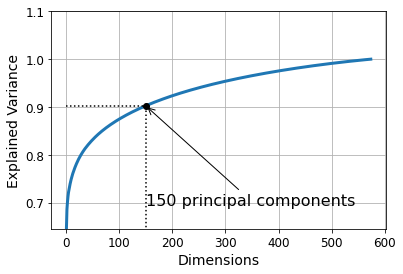

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(cumsum_eig, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.ylim([cumsum_eig[0],1.1])
plt.plot([d, d], [0, p], "k:")
plt.plot([0, d], [p, p], "k:")
plt.plot(d, p, "ko")
plt.annotate("150 principal components", xy=(d, p), xytext=(d, cumsum_eig[0]+0.05),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
# plt.savefig('pca_norm_Explained_Variance.png')
plt.show()

In [ ]:
pca_compress = PCA(n_components=d)
pca_compress.fit(all_values)
X_train_pca = pca_compress.transform(train_all_values)
X_test_pca = pca_compress.transform(test_all_values)
X_all_pca = pca_compress.transform(all_values)

In [ ]:
joblib.dump(X_train_pca, '/content/drive/MyDrive/output_files/DATA/PCA_data/X_train_pca1.pkl')
joblib.dump(X_test_pca, '/content/drive/MyDrive/output_files/DATA/PCA_data/X_test_pca1.pkl')
joblib.dump(X_all_pca, '/content/drive/MyDrive/output_files/DATA/PCA_data/X_all_pca1.pkl')
joblib.dump(pca_compress, '/content/drive/MyDrive/output_files/DATA/PCA_data/pca_compress_to_921.pkl')

['/content/drive/MyDrive/output_files/DATA/PCA_data/pca_compress_to_921.pkl']